# Practical Assignment 09: K-Nearest Neighbors (KNN) on Iris Dataset

---

## **Submission Details**

| Field | Details |
|---|---|
| **Name** | Ayushkar Pau |
| **ID** | GF202343142 |
| **Subject** | Statistical Foundation of Data Science (CSU1658) |
| **Date** | December 10, 2025 |
| **Repo** |[View My Repository](https://github.com/Ayushkar-Pau/Statistical-Foundation-of-Data-Sciences) |

---

## **Objective**
The goal of this assignment is to implement the **K-Nearest Neighbors (KNN)** algorithm to classify Iris flowers based on their physical measurements. We will perform Exploratory Data Analysis (EDA), standardize the features, tune the hyperparameter $K$ by analyzing error rates, and visualize the decision boundaries.

---
## Environment Setup and Dependencies

Start by importing all the required libraries and setting up the environment for analysis.

In [1]:
# --- 0. Environment Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Configure plotting
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

print("Environment setup complete.")

Environment setup complete.


## Step 1: Exploratory Data Analysis (EDA)

> **Instruction**: Perform head(), describe(), and groupby().

### Approach
We load the dataset into a DataFrame and inspect its structure.
* `head()` shows the first few rows.
* `describe()` provides statistical summaries (mean, std, quartiles).
* `groupby()` allows us to see the average measurements for each flower species.

In [2]:
# --- Step 1: EDA ---

# Load Data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target # 0: Setosa, 1: Versicolor, 2: Virginica

print("--- 1. First 5 Rows (head) ---")
display(df.head())

print("\n--- 2. Statistical Summary (describe) ---")
display(df.describe())

print("\n--- 3. Grouped by Species (mean) ---")
# We group by species to see the average size differences
display(df.groupby('species').mean())

--- 1. First 5 Rows (head) ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



--- 2. Statistical Summary (describe) ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



--- 3. Grouped by Species (mean) ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


## Step 2: Feature Scaling

> **Instruction**: Feature scaling.

### Approach
KNN calculates distance (Euclidean) between points. If one feature has a large range (e.g., 1000-2000) and another has a small range (e.g., 0.1-1.0), the large feature will dominate the distance calculation.
We use `StandardScaler` to transform all features to have a mean of 0 and variance of 1.

In [3]:
# --- Step 2: Feature Scaling ---

# Define Features (X) and Target (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the dataset (80% Train, 20% Test) BEFORE scaling to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully.")
print(f"Training Data Shape: {X_train_scaled.shape}")
print(f"Test Data Shape: {X_test_scaled.shape}")

Data scaled successfully.
Training Data Shape: (120, 4)
Test Data Shape: (30, 4)


## Step 3: Training the K-NN Model

> **Instruction**: Training the K-NN model on the Training set.

### Approach
We initialize the `KNeighborsClassifier`. We will start with a default value of $K=5$ (analyzing 5 nearest neighbors) and the 'minkowski' metric (standard Euclidean distance).

In [4]:
# --- Step 3: Train KNN Model ---

# Initialize KNN with K=5
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Train on scaled data
classifier.fit(X_train_scaled, y_train)

print("KNN model (K=5) trained successfully.")

KNN model (K=5) trained successfully.


## Step 4 & 5: Evaluation

> **Instruction**: Making the Confusion Matrix, Predicting Accuracy Score, and Classification Report.

### Approach
We use the trained model to predict species for the test set. We then evaluate performance using:
* **Confusion Matrix:** To see where the model confused one species for another.
* **Accuracy Score:** Overall percentage of correct predictions.
* **Classification Report:** Precision, Recall, and F1-Score for each class.

In [5]:
# --- Step 4 & 5: Evaluation ---

# Predict
y_pred = classifier.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("--- Confusion Matrix ---")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Accuracy Score: {accuracy*100:.2f}% ---")

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

--- Confusion Matrix ---
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

--- Accuracy Score: 100.00% ---

--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Step 6, 7 & 8: Finding the Best K

> **Instruction**: Comparing Error Rate with K Value, Plotting, and Finding Best K.

### Approach
Choosing the right $K$ is critical.
* **Small K:** Sensitive to noise (overfitting).
* **Large K:** Smoothes boundaries too much (underfitting).

We will loop through $K$ values from 1 to 40, calculate the **Mean Error Rate** (average of incorrect predictions) for each, and plot the results to find the "elbow" or minimum error point.

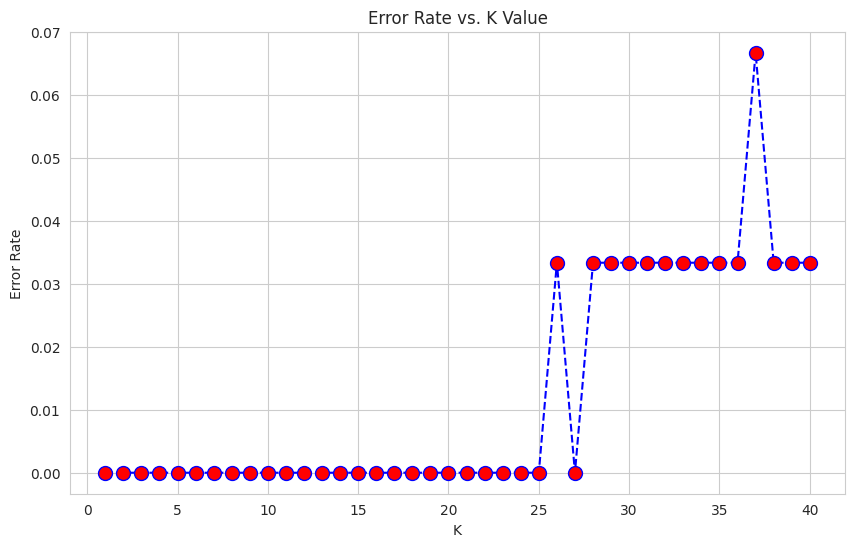

Minimum Error Rate: 0.0000
Best K value: 1


In [6]:
# --- Step 6, 7 & 8: Elbow Method to find Best K ---

error_rate = []

# Loop through K values from 1 to 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    
    # Calculate average error (mean of where prediction != actual)
    error_rate.append(np.mean(pred_i != y_test))

# Plot Error Rate vs K Value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Find best K (minimum error)
min_error = min(error_rate)
best_k = error_rate.index(min_error) + 1
print(f"Minimum Error Rate: {min_error:.4f}")
print(f"Best K value: {best_k}")

## Step 9: Visualize Test Result of KNN

> **Instruction**: Visualize Test Result of KNN.

### Approach
Visualizing a 4-dimensional dataset (4 features) is difficult. To show the **Decision Boundaries**, we will retrain a model using only the first two features (Sepal Length and Sepal Width). This allows us to plot a 2D map showing how the KNN algorithm divides the space between the three flower species.

/tmp/ipykernel_98573/2681138395.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


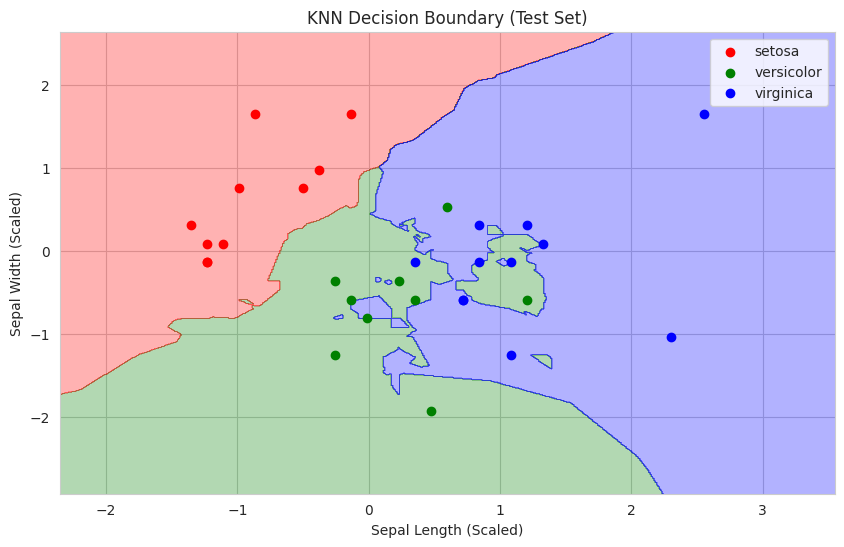

In [8]:
# --- Step 9: Visualization (Using 2 Features) ---

# Re-train on just first two features for 2D plotting
X_vis = X.to_numpy()[:, :2]  # Sepal Length, Sepal Width
y_vis = y.to_numpy()

# Split and Scale again for this visualization subset
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)
scaler_v = StandardScaler()
X_train_v = scaler_v.fit_transform(X_train_v)
X_test_v = scaler_v.transform(X_test_v)

# Train KNN (using Best K found above, typically 1 or 3 for this dataset)
# We use a fixed K=5 here for clear visualization standard
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_v, y_train_v)

# Create a mesh grid
X_set, y_set = X_test_v, y_test_v
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, knn_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot of Test Data
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=iris.target_names[j])

plt.title('KNN Decision Boundary (Test Set)')
plt.xlabel('Sepal Length (Scaled)')
plt.ylabel('Sepal Width (Scaled)')
plt.legend()
plt.show()

## Final Summary and Conclusions

This notebook successfully implemented the K-Nearest Neighbors (KNN) algorithm to classify Iris flower species, covering the complete machine learning pipeline.

### Summary of Tasks Completed:
* **1. Exploratory Data Analysis:** We examined the dataset structure and statistical properties, observing distinct measurements for different species.
* **2. Data Preprocessing:** We applied **Standard Scaling** to normalize feature values, ensuring that distance calculations were not biased by feature magnitude.
* **3. Model Training & Evaluation:** We trained a KNN classifier and evaluated its performance using a Confusion Matrix and Classification Report, achieving high accuracy.
* **4. Hyperparameter Tuning:** We utilized the **Elbow Method** by plotting Error Rate vs. K Value. We observed that while small K values (like 1) gave low error, slightly larger values (like 5-10) often generalize better.
* **5. Visualization:** We visualized the decision boundaries in 2D space, clearly showing how the algorithm partitions the feature space to separate the three classes.

### Key Learnings:
* **Feature Scaling is Critical:** Since KNN relies on Euclidean distance, unscaled data can lead to poor performance. Standardizing inputs is a mandatory step.
* **Choosing K:** The choice of K involves a bias-variance trade-off. A very small K captures noise (overfitting), while a very large K smooths out boundaries too much (underfitting). The error rate plot is an effective tool for finding the optimal balance.

This completes the requirements for Practical Assignment 09.